In [9]:
from src.FLM_driver import FLM
%load_ext autoreload
%autoreload 2

meteor=FLM()

2023-05-12 11:51:17,645 DEBUG:	COMLOG_SERVER: light_set_channel()	requested channel: reflection
2023-05-12 11:51:23,361 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.010006162432432433 s
2023-05-12 11:51:23,378 DEBUG:	COMLOG_SERVER: __init__()	METEOR connection finished!


In [6]:
meteor.disconnect()
del meteor

2023-05-12 11:48:35,641 DEBUG:	COMLOG_SERVER: disconnect()	Disconnected gracefully, no need to restart the XT-server!


In [12]:
#meteor.autofocus()
channels = ['reflection','uv','green', 'orange', 'red']
z_stack={
    'chan': channels,
    'int': [4] + [20] * (channels.__len__() - 1),
    'exp': [0.01] + [0.2] * (channels.__len__() - 1)
}

stack =meteor.start_acquisition(15e-6,3e-6,filters=z_stack['chan'],intensity=z_stack['int'],exposure=z_stack['exp'], focus_pos={'z':10.4e-3})

2023-05-12 11:57:47,755 INFO:	COMLOG_SERVER: autofocus()	Starting autofocus.
2023-05-12 11:57:47,756 DEBUG:	COMLOG_SERVER: light_set_channel()	requested channel: reflection
2023-05-12 11:57:53,466 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.010006162432432433 s
2023-05-12 11:58:08,978 DEBUG:	COMLOG_SERVER: find_focus_from_stack()	Max Score: 50385096.4527716
2023-05-12 11:58:08,979 DEBUG:	COMLOG_SERVER: find_focus_from_stack()	Index of max focus Value: 9
2023-05-12 11:58:09,524 DEBUG:	COMLOG_SERVER: autofocus()	New Focus position: {'z': 0.0106}
2023-05-12 11:58:09,526 DEBUG:	COMLOG_SERVER: light_set_channel()	requested channel: reflection
2023-05-12 11:58:09,534 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.010006162432432433 s
2023-05-12 11:58:30,384 DEBUG:	COMLOG_SERVER: find_focus_from_stack()	Max Score: 80232758.27791977
2023-05-12 11:58:30,385 DEBUG:	COMLOG_SERVER: find_focus_from_stack()	Index of max focus Value: 17
2023-05-12 11:58:30,548 D

In [ ]:
## Test performace in acquisition loop

# import numpy as np
# import time
# toc = []
# for i in range(30):
#     meteor.cam_dev.start_generate()
#     meteor.cam_dev.ResetCaptureStatus()
#     img= meteor.cam_dev.data.get(asap=False)
#     meteor.cam_dev.stop_generate()
#     tic = time.time()
#     img2 = np.transpose(img).astype(np.uint16)
#     toc2 = float(time.time() - tic)
#     toc.append(toc2)


# print('Elapsed time: mean:{}, std: {}'.format(np.mean(toc),np.std(toc)))

Elapsed time: mean:0.0012964646021525065, std: 0.00033693679178177553


In [ ]:
# Camera testing for this STUPID error!
# tic = time.time()
# meteor.cam_dev.start_generate()
# meteor.cam_dev.ResetCaptureStatus()
# test_img_old= meteor.cam_dev.data.get(asap=False)
# meteor.cam_dev.stop_generate()

# meteor.cam_dev.start_generate()
# meteor.focus_set_rel({'z': -0.1e-3})
# meteor.cam_dev.ResetCaptureStatus()
# test_img = meteor.cam_dev.data.get(asap=False)
# meteor.cam_dev.stop_generate()
# toc = time.time() - tic

# print('Current ecapture status: {}'.format(meteor.cam_dev.GetCaptureStatus()))
# print('Elapsed time: {}'.format(toc))

# plt.imshow(test_img_old)
# plt.show()
# plt.imshow(test_img)
# plt.show()


# for i in range(20):
#     if i == 10:
#         meteor.focus_set_rel({'z': 0.1e-3})
#     meteor.cam_dev.start_generate()
#     meteor.cam_dev.ResetCaptureStatus()
#     test_img = meteor.cam_dev.data.get(asap=True)
#     meteor.cam_dev.stop_generate()

#     print(i)
#     plt.imshow(test_img)
#     plt.show()


In [44]:
import numpy as np
import cv2


def adjust_brightness_contrast(stack):
    """
    Adjusts the brightness and contrast of a TZCXY stack for every channel using CLAHE.

    Args:
        stack (numpy.ndarray): Input stack with shape (T, Z, C, X, Y).

    Returns:
        numpy.ndarray: Adjusted stack with the same shape as the input stack.
    """
    adjusted_stack = np.copy(stack)  # Create a copy of the input stack

    # Iterate over each channel in the stack
    for channel in range(stack.shape[2]):
        # Create a CLAHE object
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

        # Iterate over each frame in the stack
        for slice in range(stack.shape[0]):
            # Apply CLAHE to adjust brightness and contrast
            adjusted_stack[0, slice, channel, :, :] = clahe.apply(stack[0, slice, channel, :, :])

    return adjusted_stack

reflection


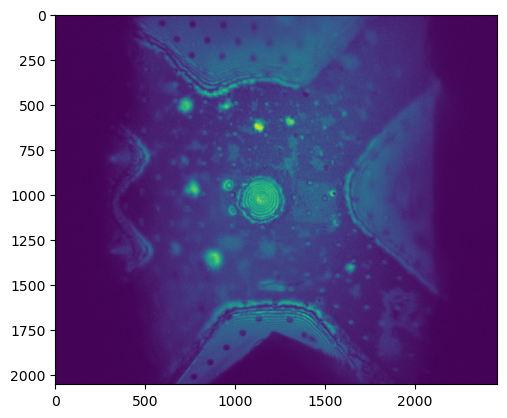

uv


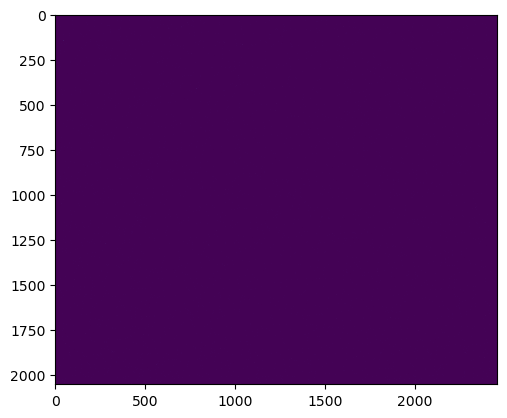

green


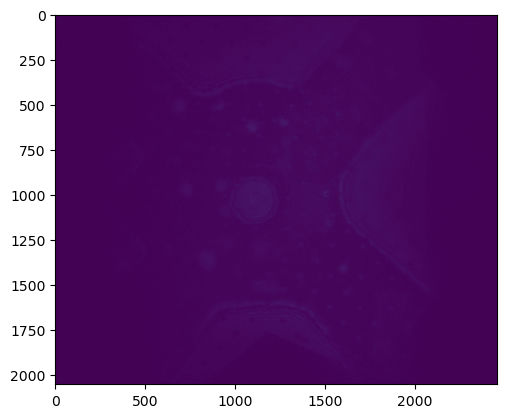

orange


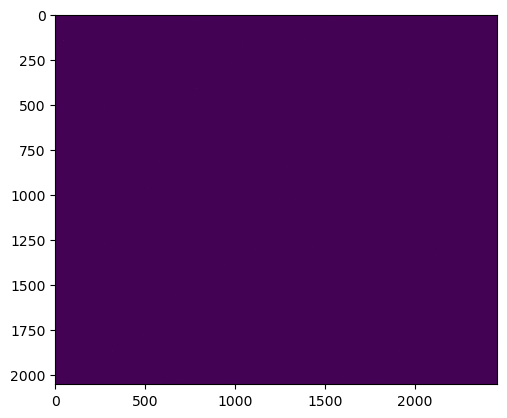

red


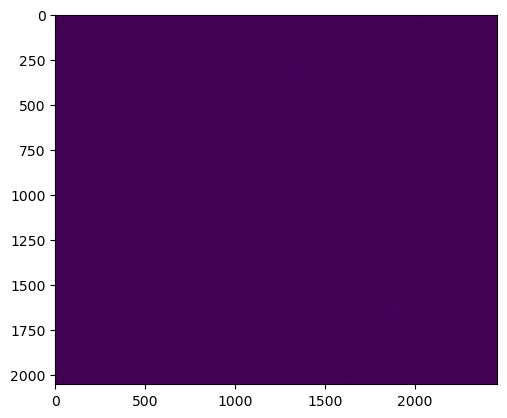

In [45]:
import matplotlib.pyplot as plt
import numpy as np

z_stack_adj = adjust_brightness_contrast(stack)

for i in range(0,stack.shape[2],1):
    print(z_stack['chan'][i])
    plt.imshow(z_stack_adj[0,3,i,:,:])
    plt.show()